<a href="https://colab.research.google.com/github/osmarbraz/exemplos_BERT/blob/main/ExemplosInspecionado_Vocabulario_BERT_pt_br.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Inpecionando o Vocabulário do BERT em português(pt-br) usando Transformers by HuggingFace

Usando transformers

Modelo pré treinado em português
Link dos arquivos do modelo pt-br BERT

https://github.com/neuralmind-ai/portuguese-bert

Lista dos modelos

https://huggingface.co/models

## Carrega o modelo

Instalando a implementação huggingface do transformers.

In [ ]:
!pip install transformers

## Carregando o modelo pré-treinado BERT

#### Usando o BERT da comunidade ou diretório v2

Permite configurar o **tamanho do modelo** e a **fonte do modelo**.

A variável `fonteBERT` com os valores `comunidade` ou `diretório` especifica se deve ser carregado o BERT de um diretório ou da comunidade.

A variável `tamanhoBERT` com os valores `base` ou `large` especifica se o tamanho do modelo BERT a ser utilizado.

##### Download do arquivo do Pytorch Checkpoint

É necessário realizar o download do arquivo de checkpoint e do vocabulário.

O arquivo do checkpoint precisa ser descompactado.

Os arquivos do modelo e do vocabulário são movidos para o diretório `modelo`.

In [ ]:
# Importando as bibliotecas
import os

# Variável fonte especifica a origem do modelo(comunidade ou diretório)
fonteBERT = 'comunidade'
#fonteBERT = 'diretorio'

# Especifica o tamanho do modelo a ser carregado(base ou large)
#tamanhoBERT = 'large'
tamanhoBERT = 'base'

# Se a variável 'fonteBERT' foi setada para 'diretorio' faz o download dos arquivos modelo
if fonteBERT == 'diretorio':
    
    # Se a variável 'tamanhoBERT' foi setada para 'base' faz o download do arquivo do tamanho base do BERT, caso contrário do large.
    if tamanhoBERT == 'base':
        # url do arquivo do modelo do Pytorch checkpoint
        # arquivo menor(base) 1.1 Gbytes
        url = "https://neuralmind-ai.s3.us-east-2.amazonaws.com/nlp/bert-base-portuguese-cased/bert-base-portuguese-cased_pytorch_checkpoint.zip"
    else:
        # url do arquivo do modelo do Pytorch checkpoint
        # arquivo grande(large) 3.5 Gbytes
        url = "https://neuralmind-ai.s3.us-east-2.amazonaws.com/nlp/bert-large-portuguese-cased/bert-large-portuguese-cased_pytorch_checkpoint.zip"

    # Diretório descompactação do modelo
    diretorio = '/content/modelo'

    # Recupera o nome do arquivo do modelo da url anterior
    arquivo = url.split("/")[-1]

    # Nome do arquivo do vocabulário
    arquivo_vocab = "vocab.txt"

    # Caminho do arquivo na url
    caminho = url[0:len(url)-len(arquivo)]

    # Verifica se a pasta de descompactação existe no pasta corrente
    if not os.path.exists(diretorio):
   
        # Realiza o download do arquivo do modelo
        !wget $url
    
        # Descompacta o arquivo na pasta de destino
        !unzip -o $arquivo -d $diretorio

        # Realiza o download do arquivo do vocabulário
        # O vocabulário não está no arquivo compactado acima
        # Concatena o caminho do modelo mais o nome do arquivo do vocabulário
        url_vocab = caminho + arquivo_vocab

        # Realiza o download do arquivo do vocabulário
        !wget $url_vocab
    
        # Move o arquivo do vocabulário para o diretório do modelo
        !mv $arquivo_vocab $diretorio
            
        # Move o arquivo do modelo para o diretório do modelo
        !mv $arquivo $diretorio      
                
        print('Diretório do modelo:\'' + diretorio + '\' pronta!')
    else:      
      print('Diretório do modelo:\'' + diretorio + '\' já existe!')

    #lista a pasta corrente
    !ls -la $diretorio
else:
    print('Será carregado o BERT da comunidade')

Será carregado o BERT da comunidade


##### Carregando o BERT

Carregando o **tokenizador** e **modelo** BERT do diretório '/content/modelo/' do diretório padrão.


In [ ]:
# Importando as bibliotecas do Modelo e do Tokenizador
from transformers import BertModel, BertTokenizer

# Se a variável 'fonteBERT' foi setada para 'diretorio' faz o download dos arquivos modelo
if fonteBERT == 'diretorio':

    # Carregando o Tokenizador do diretório
    print('Carregando o tokenizador BERT_' + tamanhoBERT + ' do diretório ' + diretorio + '...')

    tokenizer = BertTokenizer.from_pretrained(diretorio)

    # Carregando o Modelo do diretório
    print('Carregando o modelo BERT_' + tamanhoBERT + ' do diretório ' + diretorio + '...')

    model = BertModel.from_pretrained(diretorio)

else:
    # Se a variável 'tamanhoBERT' foi setada para 'base' faz o carregamento do tamanho base do BERT, caso contrário do large.
    if tamanhoBERT == 'base':
        # Carregando o Tokenizador da comunidade
        print('Carregando o tokenizador BERT_base da comunidade...')

        tokenizer = BertTokenizer.from_pretrained('neuralmind/bert-base-portuguese-cased')  

        # Carregando o Modelo da comunidade
        print('Carregando o modelo BERT_base da comunidade...')

        model = BertModel.from_pretrained('neuralmind/bert-base-portuguese-cased')  
    else:
        # Carregando o Tokenizador da comunidade  
        print('Carregando o tokenizador BERT_large da comunidade...')

        tokenizer = BertTokenizer.from_pretrained('neuralmind/bert-large-portuguese-cased')  

        # Carregando o Modelo da comunidade
        print('Carregando o modelo BERT_large da comunidade...')

        model = BertModel.from_pretrained('neuralmind/bert-large-portuguese-cased')  


Carregando o tokenizador BERT_base da comunidade...
Carregando o modelo BERT_base da comunidade...


## Inspecionando Vocabulário BERT
--------------------------

### Descarregar Vocabulário
--------------

Recupere a lista inteira de "tokens" e escreva em  um arquivo texto para que possamos examiná-los.

In [ ]:
with open("vocabulario.txt", 'w') as f:
    
    # Para cada token...
    for token in tokenizer.vocab.keys():
        
        # Escreve ele na saída com um caracter de escape unicode.            
        f.write(token + '\n')

Ao ler o vocabulário, estou vendo o seguinte:

* Os primeiros 99 tokens (indexados 1) parecem estar reservados e a maioria possui o formato [unused957].
     * 1 - [PAD]
     * 101 - [UNK]
     * 102 - [CLS]
     * 103 - [SEP]
     * 104 - [MÁSCARA]
* As linhas 22279-29794 parecem ser um despejo de caracteres individuais.
     * Eles não parecem ser classificados por frequência (por exemplo, as letras do alfabeto não estão todas em sequência).
* A primeira palavra é "de" na posição 126.
     * A partir daí, as palavras parecem ser classificadas por frequência.
     * As ~ 18 palavras principais são palavras inteiras e o número 2016 é ##s, presumivelmente a subpalavra mais comum.
     * A última palavra inteira é 22278, "Minnes"

Algumas inclusões engraçadas:
* Abdul
* baga


### Characteres único
---------------------

O código a seguir imprime todos os tokens de caracteres únicos no vocabulário, bem como todos os tokens de caracteres únicos precedidos por '##'.

Acontece que esses são conjuntos correspondentes conjunto--para de cada caractere independente também há uma versão '##'. Existem 997 tokens de caractere único.

A célula a seguir itera sobre o vocabulário, guardando todos os tokens de caractere único.

In [ ]:
one_chars = []
one_chars_hashes = []

# Para cada token no vocabulário...
for token in tokenizer.vocab.keys():
        
    # Grava qualquer token com um simples caracter.
    if len(token) == 1:
        one_chars.append(token)
        
    # Grava tokens de caractere único precedidos de dois hash.    
    elif len(token) == 3 and token[0:2] == '##':
        one_chars_hashes.append(token)

print(len(one_chars))
print(len(one_chars_hashes))

242
7534


In [ ]:
print('Número de tokens de um único caractere:', len(one_chars), '\n')

# Imprime todos os caracteres únicos, 40 por linha.

# Para cada batch de 40 tokens...
for i in range(0, len(one_chars), 40):
        
    # Limita o índice final para que não ultrapassem o final da lista.
    end = min(i + 40, len(one_chars) + 1)
        
    # Imprime os tokens, separados por um espaço
    print(' '.join(one_chars[i:end]))

Número de tokens de um único caractere: 242 

! " # $ % & ' ( ) * + , - . / d e a p c : ; < = > ? @ s o n f t [ \ ] ^ _ u m A
C v E { | } ~ ¡ S § 1 « P M ¶ · l » ¿ O b g B 2 N D é i R F T j L G I J H h à V
U á W K 3 ú ՚ ՛ ՜ ՝ ՞ 4 ։ ֊ ־ ׃ 5 ׳ ״ ، ؍ ؛ ؟ X ٪ ٫ ٬ ٭ ۔ 6 । ॥ ॰ Y 7 É Z 8 “ 9
Á r – k ་ ། ၊ ။ ၌ ၍ ၎ ၏ ‖ ‚ „ ‟ † ‡ • ․ ‥ ‧ ‰ ′ ″ ‹ › ※ ‿ ⁾ z ₍ ₎ 〈 〉 ⟨ ⟩ 、 。 〃
〈 〉 《 》 「 」 『 』 【 】 〔 〕 〖 〗 〜 〝 — ・ í 0 w ó Í x y À Q ° Ó ‘ Ú ﴾ ﴿ ︰ ﹐ ﹑ ﹔ ﹕ ﹝ ﹞
﹣ ！ ＂ ＃ ％ ＆ （ ） ＊ ， － ． ／ ： ； ？ ＠ ［ ＼ ］ ＿ ｡ ｢ ｣ ､ ･ Â ́ £ → ” ’ ` ― ‐ ‒ ‛ ។ ᨞ ⌈
⌉ ⸱


In [ ]:
print('Número de tokens de um único caractere com hashes:', len(one_chars_hashes), '\n')

# Imprime todos os caracteres únicos, 40 por linha.

# Remova as marcas de hash, uma vez que elas apenas bagunçam a tela.
tokens = [token.replace('##', '') for token in one_chars_hashes]

# Para cada batch de 40 tokens...
for i in range(0, len(tokens), 40):
    
    # Limita o índice final para que não ultrapassem o final da lista.
    end = min(i + 40, len(tokens) + 1)
    
    # Imprime os tokens, separados por um espaço
    print(' '.join(tokens[i:end]))

Número de tokens de um único caractere com hashes: 7534 

" ( - “ , . – [ — ' & / < « = ) # : $ + • ‘ ; ! | % * · > ? a e o s r i d n t m
u c l p v g f b h ã q ç é A 1 á C z í 0 S E P M x 2 j 9 ó O B D N T R I F ê y L
G õ 8 k ú J 5 3 4 7 6 V H U à w â W K ô X Q Y Z É ] ” _ Á ü ° Í ’ ö » ñ è À ō Ó
ä Ú ā а ć α ́ о ū Â и ë š е ł н ο р μ ν ø ş Ã ı ρ в æ × ς ε с ι Ç č к ī л σ τ }
ا λ → т ß ï £ { € å Ê β π ː ~ § ò κ \ î ă − ′ ń ー Ö ω ð ì д ğ י ē ` м у Ô ل @ θ
γ φ ו û δ ž † ر η ù υ ч ό й ș ί ي ś Š ن م ± ה Å ⁄ א ン ý ά ^ Ō я С б ə ب χ و ы ь
Σ ל ר г Δ Č ス ル Ü د п ˈ の з מ ή ě ש ラ ę İ ® ― ř έ س х ḥ ∈ ≤ В ב נ ¬ Î Đ ♭ Ø ő К
А ת ・ Æ œ Ş ע ɛ ż イ ト М ی Π ● đ リ Ł Ž ¡ ą ύ Р і ع ↑ ‐ Ω ة ŋ ् ク ṣ ت ه ד Д ц ा ṭ
Ś ш ם ア ξ ف П Ḥ ش ǎ ح Α ≥ ロ 大 ţ ψ Н ן र ɔ Γ ッ Ò ¥ ח َ ְ ج シ ジ ʃ タ ド ζ ק い ẓ þ Φ
ж כ ￼ Ñ Г Б › ♯ ź ָ া 国 Þ ʔ Õ Λ И „ フ О ּ ἀ 中 Ä ʿ ִ פ म ↔ カ レ Ż 日 ț ̈ ≠ 人 ق 「 」
ウ È マ न ἐ ィ 이 ÿ ė ز ャ ɐ ك ʾ オ テ 天 Κ ա า ブ ǔ ệ 子 ַ ط स ि ร ḳ ■ ニ バ 山 王 ʻ Ε Т ∞ ュ
ũ Μ ώ э ص ა ∧ 月 Л ט ṇ 田 ～ ¿ ʼ ס क े パ 武 ĩ Ф ј ِ ⊆ る ミ ह ≈ ★ ⟨ 

In [ ]:
print('Are the two sets identical?', set(one_chars) == set(tokens))

Are the two sets identical? False


### Subpalavras vs. palavras inteiras

Vamos reunir algumas estatísticas sobre o vocabulário.



/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


Maximum token length: 16


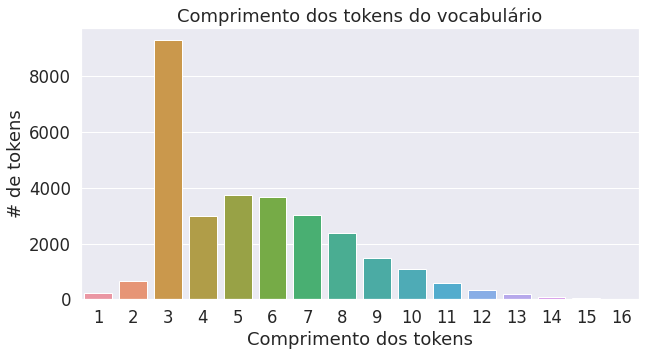

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

sns.set(style='darkgrid')

# Aumente o tamanho do gráfico e o tamanho da fonte.
sns.set(font_scale=1.5)
plt.rcParams["figure.figsize"] = (10,5)

# Medida do comprimento de cada token no vocabulário.
token_lengths = [len(token) for token in tokenizer.vocab.keys()]

# Plota o número de tokens pr cada tamanho.
sns.countplot(token_lengths)
plt.title('Comprimento dos tokens do vocabulário')
plt.xlabel('Comprimento dos tokens')
plt.ylabel('# de tokens')

print('Maximum token length:', max(token_lengths))

Vamos olhar somente os tokens que começam com '##'.

In [ ]:
num_subwords = 0

subword_lengths = []

# Para cada token no vocabulário ...
for token in tokenizer.vocab.keys():
    
    # Se ela tem uma subpalavra...
    if len(token) >= 2 and token[0:2] == '##':
        
        # Conta todas as subpalavras
        num_subwords += 1

        # Medida do comprimento da subpalavra (sem os hashes)
        length = len(token) - 2

        # Registra o tamanho.        
        subword_lengths.append(length)


Quantos tokens '##' existem vs. o vocabulário completo?

In [ ]:
vocab_size = len(tokenizer.vocab.keys())

print('Número de subpalavras: {:,} of {:,}'.format(num_subwords, vocab_size))

# Calcule a porcentagem de palavras que são '##' subpalavras.
prcnt = float(num_subwords) / vocab_size * 100.0

print('%.1f%%' % prcnt)

Número de subpalavras: 13,434 of 29,794
45.1%


Plotando o tamanho das subpalavras (não incluindo os caracteres '##').

/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


Text(0, 0.5, '# de ## Subpalavras')

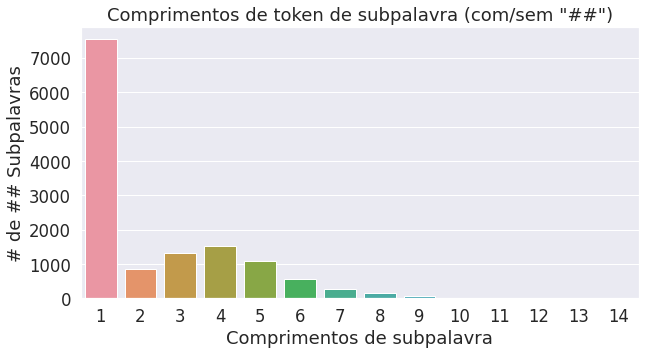

In [ ]:
sns.countplot(subword_lengths)
plt.title('Comprimentos de token de subpalavra (com/sem "##")')
plt.xlabel('Comprimentos de subpalavra')
plt.ylabel('# de ## Subpalavras')

### Erros ortográficos

In [ ]:
'crescer' in tokenizer.vocab # Correto

True

In [ ]:
'crecer' in tokenizer.vocab # Errado

False

In [ ]:
'governo' in tokenizer.vocab # Correto

True

In [ ]:
'gorverno' in tokenizer.vocab # Errado

False

In [ ]:
'inicio' in tokenizer.vocab # Correto

True

In [ ]:
'inisio' in tokenizer.vocab # Errado

False

In [ ]:
'separado' in tokenizer.vocab # Correto

True

In [ ]:
'seperado' in tokenizer.vocab # Errado

False

E as contrações?

In [ ]:
"você" in tokenizer.vocab # Correto

True

In [ ]:
"vc" in tokenizer.vocab # Errado

False

### Início versus subpalavras médias

Para caracteres únicos, existe o caractere individual e a versão '##' para cada caractere. O mesmo vale para subpalavras?

In [ ]:
# Para cada token no vocabulário...
for token in tokenizer.vocab.keys():
    # Se ela é uma subpalavras...
    if len(token) >= 2 and token[0:2] == '##':
        if not token[2:] in tokenizer.vocab:
            print('Did not find a token for', token[2:])
            break

Did not find a token for nt


In [ ]:
'##te' in tokenizer.vocab

True

In [ ]:
'te' in tokenizer.vocab

True

### Nomes



In [ ]:
!pip install wget

In [ ]:
import wget
import random 

print('Beginning file download with wget module')

url = 'http://www.gutenberg.org/files/3201/files/NAMES.TXT'
wget.download(url, 'first-names.txt')


Beginning file download with wget module


'first-names (2).txt'

In [ ]:
# Leia-os no.
with open('first-names.txt', 'rb') as f:
    names_encoded = f.readlines()

names = []

# Decodifique os nomes, converta em minúsculas e retire as novas linhas.
for name in names_encoded:
    try:
        names.append(name.rstrip().lower().decode('utf-8'))
    except:
        continue

print('Número de nomes: {:,}'.format(len(names)))
print('Exemplo:', random.choice(names))


Número de nomes: 21,985
Exemplo: giliane


In [ ]:
num_names = 0

# Para cada nome da lista...
for name in names:

    # Se ela está no vocabulário...
    if name in tokenizer.vocab:
        # Conta ela.
        num_names += 1

print('{:,} nomes no vocabulário'.format(num_names))

483 nomes no vocabulário


**Mais pesquisa**

* Adicione nomes mais modernos
     * Este repositório / arquivo contém alguns nomes mais modernos. O download do arquivo não está funcionando, no entanto.
     * `https://raw.githubusercontent.com/arineng/arincli/master/lib/nome-do-primeiro-nome.txt'

* Adicione nomes comuns de outros idiomas.


### Números

In [ ]:
# Conte quantos números existem no vocabulário.
count = 0

# Para cada token no vocabulário...
for token in tokenizer.vocab:

    # Conta ele é um número.
    if token.isdigit():
        count += 1
        
        # Qualquer número >= 10,000?
        if len(token) > 4:
            print(token)

print('Vocabulário incluí {:,} números.'.format(count))

Vocabulário incluí 335 números.


In [ ]:
# Conta quantas datas entre 1600 e 2021 estão incluídas.
count = 0 
for i in range(1600, 2021):
    if str(i) in tokenizer.vocab:
        count += 1

print('Vocabulário inclui {:,} de 421 datas de 1600 - 2021'.format(count))

Vocabulário inclui 122 de 421 datas de 1600 - 2021
